# **Data Analytics**
------

## Trump Twitter Archive - Sentiment Analysis

In [ ]:
!pip install afinn

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53452 sha256=4f3c68cec87a39ba20918d2ada04a694f0b677c6a13f0ec537d184a10bf98131
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from afinn import Afinn
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize

# Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/nprapps/trump-tweet-analysis/master/data/since-20170120.json'
trump_df = pd.read_json(url)

In [ ]:
trump_df.head(5)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Still can’t believe that Bloomberg violated a ...,2018-09-01 02:40:23+00:00,5540,21996,False,1035718986871320576
1,Twitter for iPhone,Great day in North Carolina where Republicans ...,2018-09-01 02:36:57+00:00,3885,18946,False,1035718119459893248
2,Twitter for iPhone,The ABC/Washington Post Poll was by far the le...,2018-09-01 02:35:28+00:00,5164,20129,False,1035717747936768000
3,Twitter for iPhone,.@Rasmussen_Poll just came out at 48% approval...,2018-09-01 02:25:38+00:00,5717,21855,False,1035715271418413056
4,Twitter for iPhone,https://t.co/c79zLeREOA,2018-09-01 00:01:21+00:00,8506,31907,False,1035678961349668864


In [ ]:
trump_df.tail(5)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
4570,Twitter for iPhone,"January 20th 2017, will be remembered as the d...",2017-01-20 17:53:17+00:00,60604,218555,False,822502270503972864
4571,Twitter for iPhone,What truly matters is not which party controls...,2017-01-20 17:52:45+00:00,42790,180394,False,822502135233384448
4572,Twitter for iPhone,"power from Washington, D.C. and giving it back...",2017-01-20 17:51:58+00:00,18362,91143,False,822501939267141632
4573,Twitter for iPhone,Today we are not merely transferring power fro...,2017-01-20 17:51:25+00:00,20125,109640,False,822501803615014912
4574,Twitter for Android,It all begins today! I will see you at 11:00 A...,2017-01-20 12:31:53+00:00,70523,268372,False,822421390125043712


In [ ]:
print("Length trump_df", len(trump_df))

Length trump_df 4575


In [ ]:
iphone_df = trump_df.loc[trump_df.source=="Twitter for iPhone"]
print("Tweets from iPhone", len(iphone_df))
iphone_df.head()

Tweets from iPhone 4134


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Still can’t believe that Bloomberg violated a ...,2018-09-01 02:40:23+00:00,5540,21996,False,1035718986871320576
1,Twitter for iPhone,Great day in North Carolina where Republicans ...,2018-09-01 02:36:57+00:00,3885,18946,False,1035718119459893248
2,Twitter for iPhone,The ABC/Washington Post Poll was by far the le...,2018-09-01 02:35:28+00:00,5164,20129,False,1035717747936768000
3,Twitter for iPhone,.@Rasmussen_Poll just came out at 48% approval...,2018-09-01 02:25:38+00:00,5717,21855,False,1035715271418413056
4,Twitter for iPhone,https://t.co/c79zLeREOA,2018-09-01 00:01:21+00:00,8506,31907,False,1035678961349668864


In [ ]:
android_df = trump_df.loc[trump_df.source=="Twitter for Android"]
print("Tweets from Android", len(android_df))
android_df.head()

Tweets from Android 174


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
4237,Twitter for Android,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,2017-03-25 14:41:14+00:00,10116,51247,False,845646761704243200
4238,Twitter for Android,ObamaCare will explode and we will all get tog...,2017-03-25 14:37:52+00:00,22518,104321,False,845645916732358656
4307,Twitter for Android,LinkedIn Workforce Report: January and Februar...,2017-03-08 12:11:25+00:00,15769,84906,False,839448469374894080
4311,Twitter for Android,Don't let the FAKE NEWS tell you that there is...,2017-03-07 14:14:03+00:00,25982,121937,False,839116941956640768
4312,Twitter for Android,I am working on a new system where there will ...,2017-03-07 13:46:28+00:00,23777,124413,False,839110000870109184


In [ ]:
iphone_tweets = iphone_df['text']
iphone_tweets.head()

0    Still can’t believe that Bloomberg violated a ...
1    Great day in North Carolina where Republicans ...
2    The ABC/Washington Post Poll was by far the le...
3    .@Rasmussen_Poll just came out at 48% approval...
4                              https://t.co/c79zLeREOA
Name: text, dtype: object

## Textual Preprocessing
**NLTK** is one of the leading platforms for working with human language data and Python, the module NLTK is used for natural language processing. NLTK is literally an acronym for Natural Language Toolkit.

Nltk released the **Twitter-aware tokenizer**, which is designed ad-hoc for 

1.   List item
2.   List item

dealing with Twitter posts

In [ ]:
from nltk.tokenize import TweetTokenizer
tokening = TweetTokenizer()

iphone_tweets_tokenized = iphone_tweets.apply(tokening.tokenize)
iphone_tweets_tokenized

0       [Still, can, ’, t, believe, that, Bloomberg, v...
1       [Great, day, in, North, Carolina, where, Repub...
2       [The, ABC, /, Washington, Post, Poll, was, by,...
3       [., @Rasmussen_Poll, just, came, out, at, 48, ...
4                               [https://t.co/c79zLeREOA]
                              ...                        
4569    [The, forgotten, men, and, women, of, our, cou...
4570    [January, 20th, 2017, ,, will, be, remembered,...
4571    [What, truly, matters, is, not, which, party, ...
4572    [power, from, Washington, ,, D, ., C, ., and, ...
4573    [Today, we, are, not, merely, transferring, po...
Name: text, Length: 4134, dtype: object

In [ ]:
from collections import Counter
import itertools

# Function to get the counter
def get_counter(df):
  sentences = (list(itertools.chain(df)))
  flat_list = [item for sublist in sentences for item in sublist]
  c = Counter(flat_list)
  return c

Let's **print** the 10 most common tokens.

In [ ]:
c = get_counter(iphone_tweets_tokenized)
c.most_common(10)

[('.', 5639),
 (',', 4830),
 ('the', 4550),
 ('to', 2855),
 ('and', 2826),
 ('!', 2811),
 ('of', 2181),
 ('a', 1656),
 ('in', 1545),
 ('is', 1539)]

## Stopwords removal

In [ ]:
from nltk.corpus import stopwords
stop =stopwords.words('english')
stop[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
iphone_tweets_tokenized_stop = iphone_tweets_tokenized.apply(lambda x: [item for item in x if item not in stop])
iphone_tweets_tokenized_stop[:5]

0    [Still, ’, believe, Bloomberg, violated, firm,...
1    [Great, day, North, Carolina, Republicans, wel...
2    [The, ABC, /, Washington, Post, Poll, far, lea...
3    [., @Rasmussen_Poll, came, 48, %, approval, ra...
4                            [https://t.co/c79zLeREOA]
Name: text, dtype: object

In [ ]:
c_stop = get_counter(iphone_tweets_tokenized_stop)
c_stop.most_common(10)

[('.', 5639),
 (',', 4830),
 ('!', 2811),
 ('I', 887),
 (':', 817),
 ('’', 725),
 ('&', 708),
 ('...', 654),
 ('The', 628),
 ('great', 559)]

## Punctuation Removal

In [ ]:
import string
from nltk import wordpunct_tokenize

punctuation = string.punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
iphone_tweets_tokenized_stop_punct = iphone_tweets_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])
iphone_tweets_tokenized_stop_punct[:5]

0    [Still, ’, believe, Bloomberg, violated, firm,...
1     [Great, day, North, Carolina, Republicans, well]
2    [The, ABC, Washington, Post, Poll, far, least,...
3    [@Rasmussen_Poll, came, 48, approval, rate, de...
4                            [https://t.co/c79zLeREOA]
Name: text, dtype: object

In [ ]:
c_stop_punct = get_counter(iphone_tweets_tokenized_stop_punct)
c_stop_punct.most_common(10)

[('I', 887),
 ('’', 725),
 ('...', 654),
 ('The', 628),
 ('great', 559),
 ('RT', 530),
 ('“', 463),
 ('”', 453),
 ('people', 376),
 ('…', 357)]

Adding a few more stop words after getting the distinct words.

In [ ]:
stop =set(stop)
#adding some of the stopwords after observing the tweets
stop.add("The")
stop.add("And")
stop.add("I")
stop.add("J")
stop.add("K")
stop.add("I'd")
stop.add("That's")
stop.add("\x81")
stop.add("It")
stop.add("I'm")
stop.add("...")
stop.add("\x89")
stop.add("ĚĄ")
stop.add("it's")
stop.add("ă")
stop.add("\x9d")
stop.add("âÂĺ")
stop.add("Ě")
stop.add("˘")
stop.add("Â")
stop.add("âÂ")
stop.add("Ň")
stop.add("http")
stop.add("https")
stop.add("co")
stop.add("000")
stop.add("Ň")
stop.add("Ň")
stop.add("Ň")

stop.add("’")
stop.add("“")
stop.add("…")

stop.add("We")
stop.add("RT")
stop.add("@nytimes")

stop.add("U")
stop.add("S")
stop.add("A")
stop.add("M")

stop = list(stop)

In [ ]:
iphone_tweets_tokenized_final = iphone_tweets_tokenized_stop_punct.apply(lambda x: [item for item in x if item not in stop])
iphone_tweets_tokenized_final

sentences_final = (list(itertools.chain(iphone_tweets_tokenized_final)))
flat_list_final = [item for sublist in sentences_final for item in sublist]
flat_list_final

c_final = Counter(flat_list_final)
c_final.most_common(10)

[('great', 559),
 ('people', 376),
 ('Trump', 330),
 ('President', 307),
 ('Fake', 267),
 ('Democrats', 258),
 ('News', 250),
 ('many', 232),
 ('Great', 224),
 ('Thank', 208)]

## Stemming

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. 

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()

iphone_tweets_tokenized_new_stem = iphone_tweets_tokenized_final.apply(lambda x: [lancaster_stemmer.stem(item) for item in x])
iphone_tweets_tokenized_new_stem[:5]

0    [stil, believ, bloomberg, viol, firm, off, the...
1                [gre, day, nor, carolin, republ, wel]
2    [abc, washington, post, pol, far, least, acc, ...
3    [@rasmussen_poll, cam, 48, approv, rat, despit...
4                            [https://t.co/c79zlereoa]
Name: text, dtype: object

In [ ]:
sentences_stem = (list(itertools.chain(iphone_tweets_tokenized_new_stem)))
flat_list_stem = [item for sublist in sentences_stem for item in sublist]
flat_list_stem

c_stem = Counter(flat_list_stem)
c_stem.most_common(10)

[('gre', 949),
 ('new', 547),
 ('peopl', 426),
 ('country', 366),
 ('presid', 365),
 ('trump', 344),
 ('stat', 337),
 ('big', 335),
 ('job', 327),
 ('democr', 327)]

## Visualize words

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

from wordcloud import WordCloud

### iPhone

(-0.5, 399.5, 199.5, -0.5)

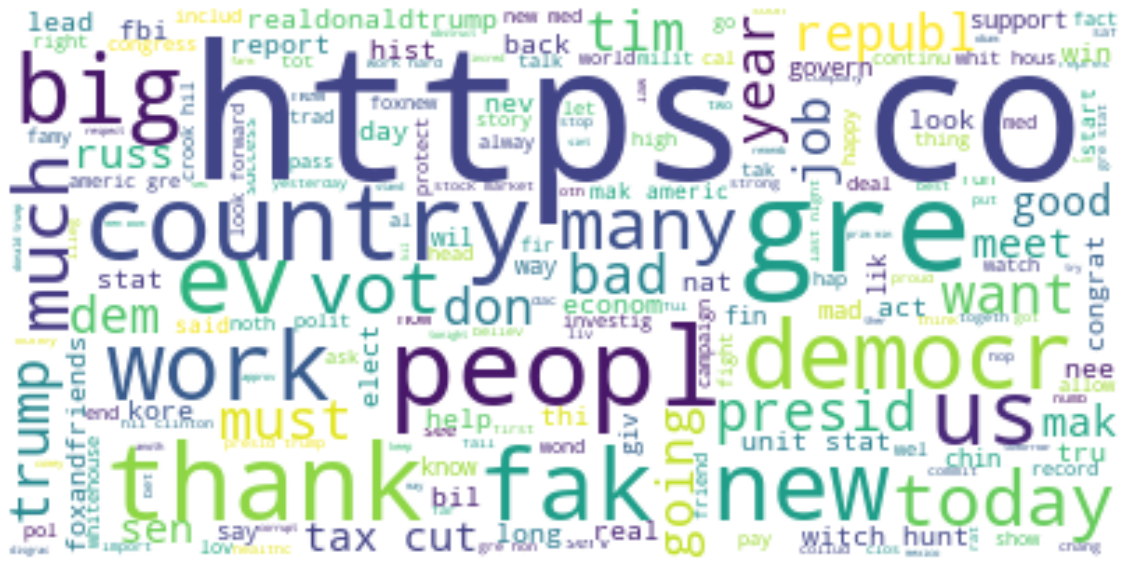

In [ ]:
iphone_sentences = (list(itertools.chain(iphone_tweets_tokenized_new_stem)))
iphone_flat_list = [item for sublist in iphone_sentences for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(iphone_flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

### Android

In [ ]:
android_tweets = android_df['text']
android_tweets.head()

android_tweets_tokenized = android_tweets.apply(tokening.tokenize)
android_tweets_tokenized

c = get_counter(android_tweets_tokenized)
c.most_common(10)

android_tweets_tokenized_stop = android_tweets_tokenized.apply(lambda x: [item for item in x if item not in stop])
android_tweets_tokenized_stop[:5]

c_stop = get_counter(android_tweets_tokenized_stop)
c_stop.most_common(10)

android_tweets_tokenized_stop_punct = android_tweets_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])
android_tweets_tokenized_stop_punct[:5]

c_stop_punct = get_counter(android_tweets_tokenized_stop_punct)
c_stop_punct.most_common(10)

android_tweets_tokenized_final = android_tweets_tokenized_stop_punct.apply(lambda x: [item for item in x if item not in stop])
android_tweets_tokenized_final

sentences_final = (list(itertools.chain(android_tweets_tokenized_final)))
flat_list_final = [item for sublist in sentences_final for item in sublist]
flat_list_final

c_final = Counter(flat_list_final)
c_final.most_common(10)

[('people', 19),
 ('FAKE', 18),
 ('NEWS', 17),
 ('country', 16),
 ('Obama', 15),
 ('media', 15),
 ('great', 14),
 ('election', 12),
 ('failing', 11),
 ('bad', 10)]

In [ ]:
android_tweets_tokenized_new_stem = android_tweets_tokenized_final.apply(lambda x: [lancaster_stemmer.stem(item) for item in x])
android_tweets_tokenized_new_stem[:5]

sentences_stem = (list(itertools.chain(android_tweets_tokenized_new_stem)))
flat_list_stem = [item for sublist in sentences_stem for item in sublist]
flat_list_stem

c_stem = Counter(flat_list_stem)
c_stem.most_common(10)

[('new', 32),
 ('fak', 25),
 ('gre', 22),
 ('peopl', 22),
 ('country', 20),
 ('bad', 17),
 ('med', 16),
 ('obam', 15),
 ('big', 14),
 ('elect', 14)]

(-0.5, 399.5, 199.5, -0.5)

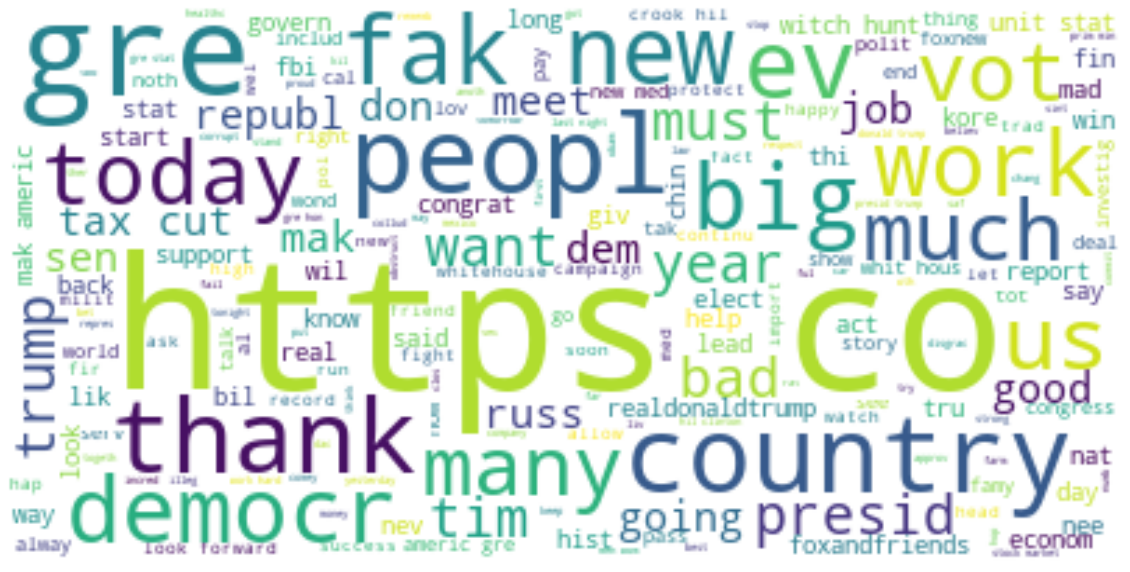

In [ ]:
android_sentences = (list(itertools.chain(iphone_tweets_tokenized_new_stem)))
android_flat_list = [item for sublist in android_sentences for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(android_flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

## Lexicon-based approach

The **AFINN** lexicon is a list of English terms manually rated for valence with an integer between -5 (negative) and +5 (positive) by Finn Årup Nielsen between 2009 and 2011.

In [ ]:
from afinn import Afinn
afinn = Afinn()

### iPhone

In [ ]:
iphone_df['afinn'] = iphone_df["text"].apply(afinn.score)
iphone_df[['afinn', 'text']].head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,afinn,text
0,-3.0,Still can’t believe that Bloomberg violated a ...
1,3.0,Great day in North Carolina where Republicans ...
2,-2.0,The ABC/Washington Post Poll was by far the le...
3,0.0,.@Rasmussen_Poll just came out at 48% approval...
4,0.0,https://t.co/c79zLeREOA
5,2.0,“President Donald J. Trump is Strengthening Re...
6,2.0,"Wow, I made OFF THE RECORD COMMENTS to Bloombe..."
7,-5.0,I will be doing a major rally for Senator Ted ...
8,5.0,"Thank you Indiana, I love you!\nhttps://t.co/T..."
11,-1.0,CNN is working frantically to find their “sour...


In [ ]:
iphone_df.afinn.value_counts()

 0.0     691
 2.0     420
 3.0     359
 1.0     271
 4.0     248
-1.0     237
 5.0     231
-2.0     216
-3.0     194
 6.0     163
-4.0     145
 7.0     121
-5.0     115
 9.0      93
 8.0      91
-6.0      87
-7.0      71
 11.0     44
-8.0      44
 12.0     39
-9.0      39
 10.0     38
-10.0     27
-12.0     27
 13.0     25
-11.0     22
 14.0     15
-13.0     10
 15.0      9
 16.0      7
 21.0      7
-14.0      6
 17.0      5
-15.0      4
-17.0      3
 19.0      2
-18.0      2
 18.0      2
-20.0      1
-16.0      1
 22.0      1
 27.0      1
Name: afinn, dtype: int64

In [ ]:
bins = [-12, -2, 0, 2, 12, 18]
iphone_df.afinn.value_counts(bins=bins, normalize=True)

(2.0, 12.0]        0.345186
(-12.001, -2.0]    0.238752
(-2.0, 0.0]        0.224480
(0.0, 2.0]         0.167150
(12.0, 18.0]       0.015239
Name: afinn, dtype: float64

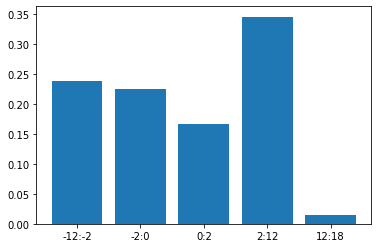

In [ ]:
bars = ('-12:-2', '-2:0', '0:2', '2:12', '12:18')
iphone_prob = [0.238752, 0.224480, 0.167150, 0.345186, 0.015239]
plt.bar(np.arange(len(bars)), iphone_prob)
plt.xticks(np.arange(len(bars)), bars)
plt.show()

### Android

In [ ]:
android_df['afinn'] = android_df["text"].apply(afinn.score)
android_df[['afinn', 'text']].head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,afinn,text
4237,0.0,Watch @JudgeJeanine on @FoxNews tonight at 9:0...
4238,0.0,ObamaCare will explode and we will all get tog...
4307,2.0,LinkedIn Workforce Report: January and Februar...
4311,1.0,Don't let the FAKE NEWS tell you that there is...
4312,0.0,I am working on a new system where there will ...
4313,-2.0,"Don't worry, getting rid of state lines, which..."
4314,2.0,"For eight years Russia ""ran over"" President Ob..."
4315,2.0,Our wonderful new Healthcare Bill is now out f...
4316,-7.0,"122 vicious prisoners, released by the Obama A..."
4324,0.0,Who was it that secretly said to Russian Presi...


In [ ]:
android_df.afinn.value_counts()

 0.0     23
 2.0     22
-2.0     18
-3.0     16
-5.0     13
 1.0     12
-7.0     12
-1.0     10
 3.0      7
 5.0      6
 6.0      5
-6.0      5
-4.0      4
 4.0      3
-9.0      3
 12.0     2
 9.0      2
-10.0     2
-8.0      2
-11.0     1
 18.0     1
 11.0     1
-12.0     1
 8.0      1
 7.0      1
 16.0     1
Name: afinn, dtype: int64

In [ ]:
bins = [-12, -2, 0, 2, 12, 18]
android_df.afinn.value_counts(bins=bins, normalize=True)

(-12.001, -2.0]    0.442529
(0.0, 2.0]         0.195402
(-2.0, 0.0]        0.189655
(2.0, 12.0]        0.160920
(12.0, 18.0]       0.011494
Name: afinn, dtype: float64

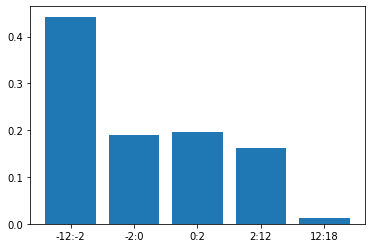

In [ ]:
bars = ('-12:-2', '-2:0', '0:2', '2:12', '12:18')
android_prob = [0.442529, 0.189655, 0.195402, 0.160920, 0.011494]
plt.bar(np.arange(len(bars)), android_prob)
plt.xticks(np.arange(len(bars)), bars)
plt.show()